# PS3-5 K-means for Compression

### (a) K-Means Compression Implementation.

In [43]:
from matplotlib.image import imread 
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(229)

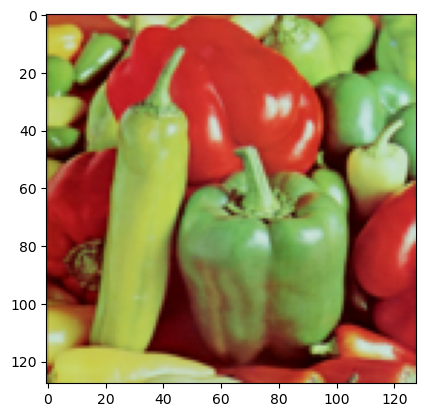

In [44]:
small = imread('./data/peppers-small.tiff')
plt.imshow(small)
plt.show()

In [45]:
class Kmeans:
    def __init__(self, num_clusters: int, max_iter: int = 1000, eps: float = 1e-5) -> None:
        """
        Args:
            num_clusters (int): number of clusters.
            max_iter (int): max number of iterations.
            eps (float): used to judge convergence.
        """
        self.k = num_clusters
        self.max_iter = max_iter
        self.eps = eps
    
    def fit(self, x: np.ndarray) -> np.ndarray:
        """
        Perform K-means clustering.
        Args:
            x (np.ndarray): data to be clustered. Shape: (m, n).
        Returns:
            centroids (np.ndarray): cluster centroids. Shape: (num_clusters, n). 
            centroilds will also be saved as an attribute of `Kmeans` class. 
        """
        centroids = x.copy()
        np.random.shuffle(centroids)
        centroids = centroids[:self.k, :]  # shape (k, n)
        n_iter = 0
        prev_centroids = None
        while n_iter < self.max_iter and (prev_centroids is None or 
                                          np.linalg.norm(centroids - prev_centroids, axis=1).max() > self.eps):
            n_iter += 1
            prev_centroids = centroids.copy()
            distances = np.linalg.norm(x[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)    # shape (m, k)
            clusters = np.argmin(distances, axis=1)  # shape (m,)
            centroids = np.array([x[clusters == i].mean(axis=0) for i in range(self.k)])    # shape (k, n)
        self.centroids = centroids.astype(int)
        print(f"K-means converged in {n_iter} iterations.")
        return self.centroids

    def apply(self, x: np.ndarray) -> np.ndarray:
        """
        Apply K-means clustering using saved centroids.
        Args:
            x (np.ndarray): data to be clustered. Shape: (m, n).
        Returns:
            clustered_x (np.ndarray): data after clustering.
        """
        distances = np.linalg.norm(x[:, np.newaxis, :] - self.centroids[np.newaxis, :, :], axis=2)    # shape (m, k)
        clusters = np.argmin(distances, axis=1)  # shape (m,)
        clustered_x = np.array([self.centroids[clusters[i]] for i in range(x.shape[0])])
        return clustered_x

In [46]:
model = Kmeans(num_clusters=16)
model.fit(small.reshape(-1, 3))

K-means converged in 80 iterations.


array([[185, 202,  90],
       [147, 152,  67],
       [119, 167,  82],
       [193, 218, 191],
       [182, 202, 147],
       [139, 189, 111],
       [112, 125,  60],
       [204, 121,  86],
       [171,  83,  50],
       [112,  76,  41],
       [186,  40,  38],
       [ 90,  19,  14],
       [ 51,   3,   2],
       [158, 184,  82],
       [145,  23,  25],
       [204,  56,  44]])

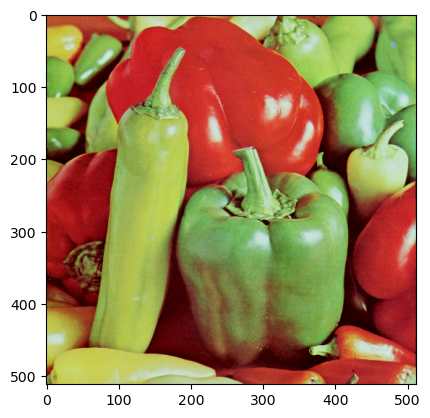

In [47]:
large = imread('./data/peppers-large.tiff')
plt.imshow(large)
plt.show()

In [48]:
clustered_img = model.apply(large.reshape(-1, 3)).reshape(large.shape)

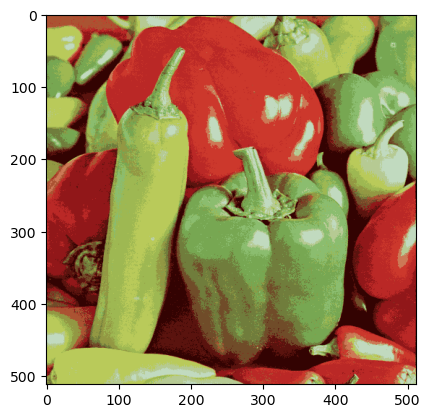

<Figure size 640x480 with 0 Axes>

In [49]:
plt.imshow(clustered_img)
plt.show()
plt.savefig('./output/peppers-large-clustered.tiff')

### (b) Compression Factor.

Compress from $3\times \log 256=24$ bits per pixel to $\log 16=4$ bits per pixel. Thus the compression factor is $6$.